In [1]:
import scipy.io
from SimPEG import *

Efficiency Warning: Interpolation will be slow, use setup.py!

            python setup.py build_ext --inplace
    


In [2]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


`%matplotlib` prevents importing * from pylab and numpy


In [3]:
import matplotlib
matplotlib.rcParams.update({'font.size': 16, 'text.usetex': True})

In [4]:
xr = np.linspace(xmin, xmax, 101)
yr = np.linspace(ymin, ymax, 101)
XY = Utils.ndgrid(xr, yr)
X, Y = XY[:,0].reshape(101, 101, order='F'), XY[:,1].reshape(101, 101, order='F')
closest2d = lambda xc, yc: np.argmin((xyz[:,0]-xc)**2+(xyz[:,1]-yc)**2)

NameError: name 'xmin' is not defined

In [5]:
directory = "C:\\Users\dominiquef.MIRAGEOSCIENCE\\Google Drive\\Tli_Kwi_Cho\\Modelling\\Inversion\\EM\\CommonMesh\\"
lake = np.loadtxt(directory+'Lake_trace.dat')

In [38]:
mesh = Mesh.TensorMesh.readUBC(directory+"CommonMesh_Kris.msh")
sigma_dighem = mesh.readModelUBC(directory+'DIGHEM_Inv10_Oct2Ten.con')
sigma_1dref_vtem = mesh.readModelUBC(directory+'VTEM_1D_Inv7.con')
sigma_merged_vtem = mesh.readModelUBC(directory+'VTEM_3D_Round2.con')
sigma_param = mesh.readModelUBC(directory+'Parametric_CommonMesh.con')

airind = sigma_dighem==1e-8
active = ~airind.copy()
sigma_1dref_vtem[mesh.gridCC[:,1]> 1000+7.133e6] = np.nan
sigma_merged_vtem[mesh.gridCC[:,1]> 1000+7.133e6] = np.nan
sigma_param[mesh.gridCC[:,1]> 1000+7.133e6] = np.nan
sigma_dighem[airind] = np.nan
sigma_merged_vtem[airind] = np.nan
sigma_param[airind] = np.nan
sigma_1dref_vtem[airind] = np.nan

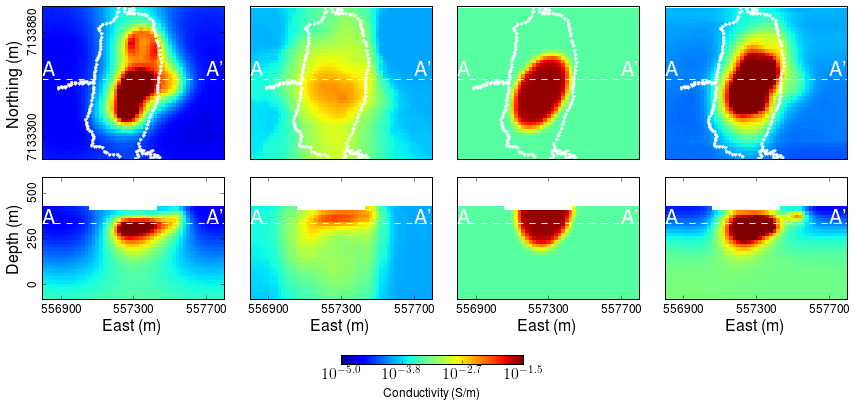

In [161]:
# from SeogiUtils import View
indz = 40
indy1 = 37
indy2 = int(np.argmin(abs(mesh.vectorCCy - 7.13359000e+06)))
vmin = -5
vmax = -1.5
title = ["Parametric", "VTEM", "DIGHEM",  "Cooperative"]
figname = "Cond_models_panel.png"
fig, ax = plt.subplots(2,4, figsize = (15,6))
xmin, xmax = 556800, 557800
ymin, ymax = 7133200, 7134000 
zmin, zmax = 0, 500
mesh.plotSlice(np.log10(sigma_dighem), ind=indz, ax=ax[0,0], clim=(vmin, vmax), grid=False, gridOpts={"alpha":0.2})
dat1=mesh.plotSlice(np.log10(sigma_1dref_vtem), ind=indz, ax=ax[0,1], clim=(vmin, vmax), grid=False, gridOpts={"alpha":0.2})
mesh.plotSlice(np.log10(sigma_param), ind=indz, ax=ax[0,2], clim=(vmin, vmax), grid=False, gridOpts={"alpha":0.2})
mesh.plotSlice(np.log10(sigma_merged_vtem), ind=indz, ax=ax[0,3], clim=(vmin, vmax), grid=False, gridOpts={"alpha":0.2})

mesh.plotSlice(np.log10(sigma_dighem), normal = 'Y', ind=indy, ax=ax[1,0], clim=(vmin, vmax), grid=False, gridOpts={"alpha":0.2})
mesh.plotSlice(np.log10(sigma_1dref_vtem), normal = 'Y', ind=indy, ax=ax[1,1], clim=(vmin, vmax), grid=False, gridOpts={"alpha":0.2})
mesh.plotSlice(np.log10(sigma_param), normal = 'Y', ind=indy, ax=ax[1,2], clim=(vmin, vmax), grid=False, gridOpts={"alpha":0.2})
dat2 = mesh.plotSlice(np.log10(sigma_merged_vtem), normal = 'Y', ind=indy, ax=ax[1,3], clim=(vmin, vmax), grid=False, gridOpts={"alpha":0.2})

for i in range(4):
    pos =  ax[0,i].get_position() 
    ax[0,i].axis("equal")
    ax[0,i].set_xlim(xmin, xmax)
    ax[0,i].set_ylim(ymin, ymax)
    ax[0,i].set_xlabel(" ", fontsize=22)
#     ax[i].set_xlabel("Easting (m)", fontsize=22)
#     ax[i].set_title(title[i], fontsize=22)
    ax[0,i].set_title("", fontsize=22)
    ax[0,i].plot(lake[:,0], lake[:,1], 'w.', lw = 2)
    if i==0:
        ax[0,i].set_ylabel("Northing (m)", fontsize=16)
        y = np.linspace(ymin + 100., ymax-120, 2)
        ax[0,i].set_yticks(map(int, y))
        ax[0,i].set_yticklabels(map(str, map(int, y)),size=12,rotation='vertical')
    else:
        ax[0,i].set_ylabel(" ")
        ax[0,i].set_yticks([])
        
    ax[0,i].set_xticks([])
    
    ax[0,i].plot(np.r_[xmin, xmax], np.r_[mesh.vectorCCy[indy1], mesh.vectorCCy[indy1]] ,'w--', lw=1)    
    ax[0,i].text(xmin, mesh.vectorCCy[indy1]+20., "A", fontsize = 20, color="w")
    ax[0,i].text(xmax-100, mesh.vectorCCy[indy1]+20., "A'", fontsize = 20, color="w")
    

    ax[1,i].axis("equal")
    ax[1,i].set_xlim(xmin, xmax)
    ax[1,i].set_ylim(50., 450.)
#     ax[i].set_xlabel("Easting (m)", fontsize=22)
    ax[1,i].set_xlabel("East (m)", fontsize=16)
#     ax[i].set_title(title[i], fontsize=22)
    ax[1,i].set_title(" ", fontsize=20)
    if i==0:
        ax[1,i].set_ylabel("Depth (m)", fontsize=16)
        y = np.linspace(zmin, zmax, 3)
        ax[1,i].set_yticks(map(int, y))
        ax[1,i].set_yticklabels(map(str, map(int, y)),size=12,rotation='vertical')
    else:
        ax[1,i].set_ylabel(" ")
        ax[1,i].set_yticks([])
        
    ax[1,i].text(xmin, mesh.vectorCCz[indz], "A", fontsize = 20, color="w")
    ax[1,i].text(xmax-100, mesh.vectorCCz[indz], "A'", fontsize = 20, color="w")
    ax[1,i].plot(np.r_[xmin, xmax], np.r_[mesh.vectorCCz[indz], mesh.vectorCCz[indz]] ,'w--', lw=1)
    x = np.linspace(xmin+100, xmax-100, 3)
    ax[1,i].set_xticks(map(int, x))
    ax[1,i].set_xticklabels(map(str, map(int, x)),size=12)
    
    ax[1,i].set_position([pos.x0-0.01*i, pos.y0-0.3250,  pos.width, pos.height*0.8])
    ax[0,i].set_position([pos.x0-0.01*i, pos.y0,  pos.width, pos.height])
    
pos =  ax[1,-1].get_position() 
cbarax = fig.add_axes([pos.x0 - 0.3, pos.y0-.15,  pos.width, pos.height*0.075])  ## the parameters are the specified position you set 
cb = fig.colorbar(dat1[0],cax=cbarax, orientation="horizontal", ax = ax[-1], ticks=np.linspace(vmin, vmax, 4), format="$10^{%.1f}$")
cb.set_label("Conductivity (S/m)",size=12)

fig.savefig(directory + figname)

7133597.39999


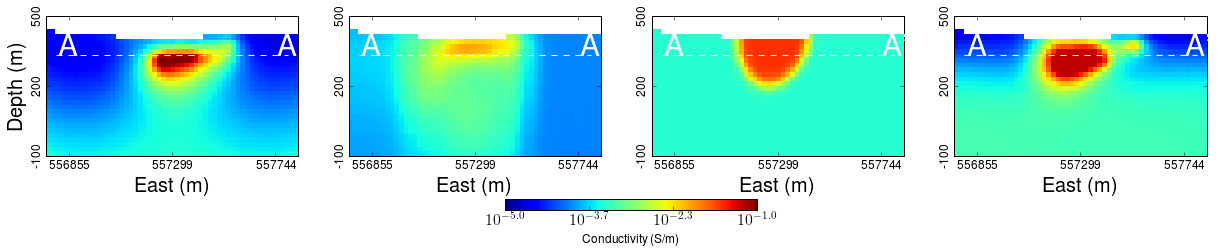

In [136]:
# from SeogiUtils import View
indy = 36
title = ["VTEM", "DIGHEM", "Merged"]
print mesh.vectorCCy[indy]
vmin = -5
vmax = -1
fig, ax = plt.subplots(1,4, figsize = (15.6+15.6/3, 2.5))
xmin, xmax = 556800, 557800
ymin, ymax = 7133200, 7134700 
zmin, zmax = -100, 500
mesh.plotSlice(np.log10(sigma_dighem), normal = 'Y', ind=indy, ax=ax[0], clim=(vmin, vmax), grid=False, gridOpts={"alpha":0.2})
mesh.plotSlice(np.log10(sigma_1dref_vtem), normal = 'Y', ind=indy, ax=ax[1], clim=(vmin, vmax), grid=False, gridOpts={"alpha":0.2})
mesh.plotSlice(np.log10(sigma_param), normal = 'Y', ind=indy, ax=ax[2], clim=(vmin, vmax), grid=False, gridOpts={"alpha":0.2})
dat = mesh.plotSlice(np.log10(sigma_merged_vtem), normal = 'Y', ind=indy, ax=ax[3], clim=(vmin, vmax), grid=False, gridOpts={"alpha":0.2})

for i in range(4):
    ax[i].axis("equal")
    ax[i].set_xlim(xmin, xmax)
    ax[i].set_ylim(50., 450.)
#     ax[i].set_xlabel("Easting (m)", fontsize=22)
    ax[i].set_xlabel("East (m)", fontsize=20)
#     ax[i].set_title(title[i], fontsize=22)
    ax[i].set_title(" ", fontsize=20)
    if i==0:
        ax[i].set_ylabel("Depth (m)", fontsize=20)
    else:
        ax[i].set_ylabel(" ")
    ax[i].text(xmin+10, mesh.vectorCCz[indz], "A", fontsize = 30, color="w")
    ax[i].text(xmax-50, mesh.vectorCCz[indz], "A'", fontsize = 30, color="w")
    ax[i].plot(np.r_[xmin, xmax], np.r_[mesh.vectorCCz[indz], mesh.vectorCCz[indz]] ,'w--', lw=1)
    x = np.linspace(xmin*1.0001, xmax*0.9999, 3)
    ax[i].set_xticks(map(int, x))
    ax[i].set_xticklabels(map(str, map(int, x)),size=12)
    y = np.linspace(zmin, zmax, 3)
    ax[i].set_yticks(map(int, y))
    ax[i].set_yticklabels(map(str, map(int, y)),size=12,rotation='vertical')
    
pos =  ax[-1].get_position() 
cbarax = fig.add_axes([pos.x0 - 0.3, pos.y0-.3,  pos.width, pos.height*0.075])  ## the parameters are the specified position you set 
cb = fig.colorbar(dat[0],cax=cbarax, orientation="horizontal", ax = ax[-1], ticks=np.linspace(vmin, vmax, 4), format="$10^{%.1f}$")
cb.set_label("Conductivity (S/m)",size=12)

7133598.61


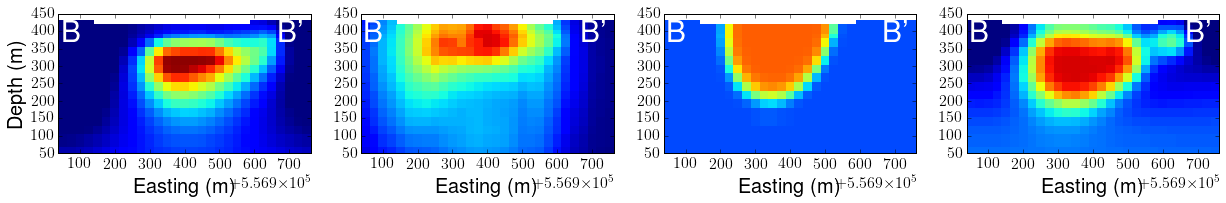

In [28]:
from SeogiUtils import View
indy = indy2
title = ["VTEM", "DIGHEM", "Merged"]
print mesh.vectorCCy[indy]
fig, ax = plt.subplots(1,4, figsize = (15.6+15.6/3., 2.5))
xmin, xmax = 556800+150, 557800-150
ymin, ymax = 1200+7.132*1e6, 2700+7.132*1e6

mesh.plotSlice(np.log10(sigma_dighem), normal = 'Y', ind=indy, ax=ax[0], clim=(-4, -1), grid=False, gridOpts={"alpha":0.2})
mesh.plotSlice(np.log10(sigma_1dref_vtem), normal = 'Y', ind=indy, ax=ax[1], clim=(-4, -1), grid=False, gridOpts={"alpha":0.2})
mesh.plotSlice(np.log10(sigma_param), normal = 'Y', ind=indy, ax=ax[2], clim=(-4, -1), grid=False, gridOpts={"alpha":0.2})
dat = mesh.plotSlice(np.log10(sigma_merged_vtem), normal = 'Y', ind=indy, ax=ax[3], clim=(-4, -1), grid=False, gridOpts={"alpha":0.2})

for i in range(4):
    ax[i].axis("equal")
    ax[i].set_xlim(xmin, xmax)
    ax[i].set_ylim(50., 450.)
    ax[i].set_xlabel("Easting (m)", fontsize=20)
#     ax[i].set_title(title[i], fontsize=22)
    ax[i].set_title("", fontsize=22)
    if i==0:
        ax[i].set_ylabel("Depth (m)", fontsize=20)
    else:
        ax[i].set_ylabel(" ")
    ax[i].text(xmin, 370., "B", fontsize = 30, color="w")
    ax[i].text(xmax-80, 370., "B'", fontsize = 30, color="w")

#     ax[i].plot(section[:,0], section[:,2], 'k.', ms=1.5)

In [150]:
import matplotlib
matplotlib.rcParams.update({'font.size': 12, 'text.usetex': True})

In [151]:
import matplotlib.gridspec as gridspec


In [160]:
def vizCond(val, vmin=-4, vmax=-1,savefig=False, figname="Conductivity.png"):
    indz = 13
    indy1 = 54
    indy = int(np.argmin(abs(mesh.vectorCCy - 7.13359000e+06)))

    print mesh.vectorCCz[indz]
    print mesh.vectorCCy[indy]
    print mesh.vectorCCy[indy1]    
    print vmin, vmax
    
    xmin, xmax = 556800.271758, 557795.500267
    ymin, ymax = 7133290.28941, 7134718.96111    
    surface = 418.
    temp = np.log10(val)
    temp[~active] = np.nan

    gs = gridspec.GridSpec(1,18)
    fig = plt.figure(figsize = (14, 4.5))
    ax1 = plt.subplot(gs[:5])
    ax2 = plt.subplot(gs[6:11])
    ax3 = plt.subplot(gs[12:17])
    
    dat1 = mesh.plotSlice(temp, normal='Z', ind=indz, ax=ax1, grid=True, gridOpts={'alpha':0.0, 'color':'w'}, clim=(vmin, vmax))
    dat2 = mesh.plotSlice(temp, normal='Y', ind=indy1, ax=ax2, grid=True, gridOpts={'alpha':0.0, 'color':'w'}, clim=(vmin, vmax))
    dat3 = mesh.plotSlice(temp, normal='Y', ind=indy, ax=ax3, grid=True, gridOpts={'alpha':0.0, 'color':'w'}, clim=(vmin, vmax))
    cb1 = plt.colorbar(dat1[0], orientation="horizontal", ax = ax2, ticks=np.linspace(vmin, vmax, 4), format="$10^{%.1f}$")
    cb2 = plt.colorbar(dat1[0], orientation="horizontal", ax = ax3, ticks=np.linspace(vmin, vmax, 4), format="$10^{%.1f}$")
    cb1.set_label("Conductivity (S/m)")
    cb2.set_label("Conductivity (S/m)")

    ax1.plot(lake[:,0], lake[:,1], 'w.', ms=2)    
    ax1.plot(np.linspace(xmin-500, xmax+500, 101), np.ones(101)*mesh.vectorCCy[indy1], 'w-', lw = 1)
    ax1.text(xmin-100., mesh.vectorCCy[indy1], 'A',fontsize =20, color="w")
    ax1.text(xmax, mesh.vectorCCy[indy1], ("A'") ,fontsize =20, color="w")
    ax1.plot(np.linspace(xmin-500, xmax+500, 101), np.ones(101)*mesh.vectorCCy[indy], 'w-', lw = 1)
    ax1.text(xmin-100., mesh.vectorCCy[indy], 'B',fontsize =20, color="w")
    ax1.text(xmax, mesh.vectorCCy[indy], ("B'") ,fontsize =20, color="w")

    ax2.text(xmin, mesh.vectorCCz[indz], 'A',fontsize =20, color="w")
    ax2.text(xmax-100., mesh.vectorCCz[indz], ("A'") ,fontsize =20, color="w")
    ax3.text(xmin, mesh.vectorCCz[indz], 'B',fontsize =20, color="w")
    ax3.text(xmax-100., mesh.vectorCCz[indz], ("B'") ,fontsize =20, color="w")
    ax3.set_yticks([])
    ax1.set_title('Surface below \n  ' + str(int(surface-mesh.vectorCCz[indz]))+' m')
    ax1.set_xlabel('Easting (m)')
    ax1.set_ylabel('Northing (m)')

    ax2.set_title('Northing at  ' + str(int(mesh.vectorCCy[indy1]))+' m')
    ax2.set_xlabel('Easting (m)')
    ax2.set_ylabel('Depth (m)')

    ax3.set_title('Northing at  ' + str(int(mesh.vectorCCy[indy]))+' m')
    ax3.set_xlabel('Easting (m)')
    ax3.set_ylabel(' ')
    x = np.linspace(xmin, xmax, 3)
    ax1.set_xticks(map(int, x))
    ax1.set_xticklabels(map(str, map(int, x)))
    ax2.set_xticks(map(int, x))
    ax2.set_xticklabels(map(str, map(int, x)))
    ax3.set_xticks(map(int, x))
    ax3.set_xticklabels(map(str, map(int, x)))

    y = np.linspace(ymin, ymax, 3)
    ax1.set_yticks(map(int, y))
    ax1.set_yticklabels(map(str, map(int, y)))
    ax2.set_yticks(map(int, y))
    ax2.set_yticklabels(map(str, map(int, y)))
    ax3.set_yticks(map(int, y))
    ax3.set_yticklabels(map(str, map(int, y)))

    ax1.axis("equal")
    ax1.set_xlim(xmin, xmax)
    ax1.set_ylim(ymin, ymax)
    ax2.set_xlim(xmin, xmax)
    ax2.set_ylim(0., 700)
    ax3.set_xlim(xmin, xmax)
    ax3.set_ylim(0., 700)
    
#     ax1.text(x1+80., y1-100, 'A3', color='w', fontsize=16)
#     ax1.text(x2+100., y2-50., 'A2', color= 'w', fontsize=16)
#     ax1.text(x3+200, y3, 'A1', color= 'w', fontsize=16)        
#     ax2.text(x3+100, z3-150, 'A1', color= 'w', fontsize=16)        
#     ax3.text(x1-200, z1-150, 'A3', color= 'w', fontsize=16)            
#     ax3.text(x2+100, z2-50, 'A2', color= 'w', fontsize=16)    
    if savefig:
        fig.savefig(figname)

318.13
7133598.61
7134473.61
-4 -1


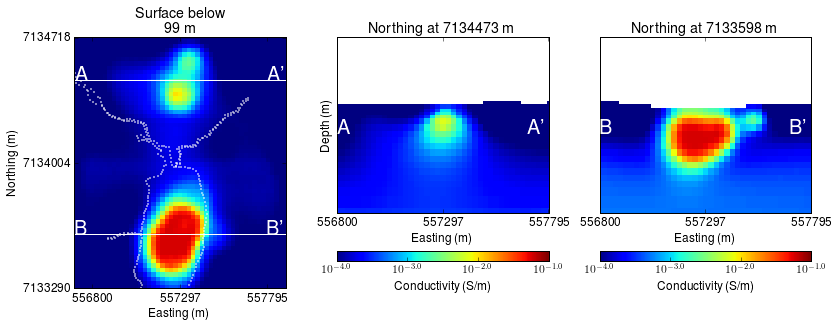

In [161]:
vizCond(sigma_merged_vtem_IP)

In [197]:
def vizE(val, valL, levels, levelsL):
    indz = 13
    indy1 = 54
    indy = int(np.argmin(abs(mesh.vectorCCy - 7.13359000e+06)))

    print mesh.vectorCCz[indz]
    print mesh.vectorCCy[indy]
    print mesh.vectorCCy[indy1]    
    vmin  = (val[active]).min()*1
    vmax  = (val[active]).max()*1.
    print vmin, vmax
    xmin, xmax = 556800.271758, 557795.500267
    ymin, ymax = 7133290.28941, 7134718.96111    
    surface = 418.
    temp  = val.copy()
    temp[~active] = np.nan

    gs = gridspec.GridSpec(1,18)
    fig = plt.figure(figsize = (14, 4.5))
    ax1 = plt.subplot(gs[:5])
    ax2 = plt.subplot(gs[6:11])
    ax3 = plt.subplot(gs[12:17])
    
    dat1 = mesh.plotSlice(temp, normal='Z', ind=indz, ax=ax1, grid=True, gridOpts={'alpha':0.0, 'color':'w'}, clim=(0., vmax))
    dat2 = mesh.plotSlice(temp, normal='Y', ind=indy1, ax=ax2, grid=True, gridOpts={'alpha':0.0, 'color':'w'}, clim=(0., vmax))
    dat3 = mesh.plotSlice(temp, normal='Y', ind=indy, ax=ax3, grid=True, gridOpts={'alpha':0.0, 'color':'w'}, clim=(0., vmax))
    cb1 = plt.colorbar(dat1[0], orientation="horizontal", ax = ax2, ticks=np.linspace(0, vmax, 4))
    cb2 = plt.colorbar(dat1[0], orientation="horizontal", ax = ax3, ticks=np.linspace(0, vmax, 4))
    cb1.set_label("Pseudo-chargeability")
    cb2.set_label("Pseudo-chargeability")

    # ax1.plot(xyz_tx[:,0], xyz_tx[:,1], 'w.', ms = 2)
    ax1.plot(np.linspace(xmin-500, xmax+500, 101), np.ones(101)*mesh.vectorCCy[indy1], 'w-', lw = 1)
    ax1.text(xmin-100., mesh.vectorCCy[indy1], 'A',fontsize =20, color="w")
    ax1.text(xmax, mesh.vectorCCy[indy1], ("A'") ,fontsize =20, color="w")
    ax1.plot(np.linspace(xmin-500, xmax+500, 101), np.ones(101)*mesh.vectorCCy[indy], 'w-', lw = 1)
    ax1.text(xmin-100., mesh.vectorCCy[indy], 'B',fontsize =20, color="w")
    ax1.text(xmax, mesh.vectorCCy[indy], ("B'") ,fontsize =20, color="w")

    ax2.text(xmin, mesh.vectorCCz[indz], 'A',fontsize =20, color="w")
    ax2.text(xmax-100., mesh.vectorCCz[indz], ("A'") ,fontsize =20, color="w")
    ax3.text(xmin, mesh.vectorCCz[indz], 'B',fontsize =20, color="w")
    ax3.text(xmax-100., mesh.vectorCCz[indz], ("B'") ,fontsize =20, color="w")

    # ax3.plot(np.linspace(ymin-500, ymax+500, 101), np.ones(101)*mesh.vectorCCz[indz], 'w-', lw = 1)
    # ax2.plot(np.linspace(xmin-500, xmax+500, 101), np.ones(101)*mesh.vectorCCz[indz], 'w-', lw = 1)

#     ax1.plot(gravcontour[:,0], gravcontour[:,1], 'r-', lw = 1)
    ax1.plot(lake[:,0], lake[:,1], 'w.', ms=2)

    ax1.set_title('Surface below \n  ' + str(int(418-mesh.vectorCCz[indz]))+' m')
    ax1.set_xlabel('Easting (m)')
    ax1.set_ylabel('Northing (m)')

    ax2.set_title('Northing at  ' + str(int(mesh.vectorCCy[indy1]))+' m')
    ax2.set_xlabel('Northing (m)')
    ax2.set_ylabel('Depth (m)')

    ax3.set_title('Northing at  ' + str(int(mesh.vectorCCy[indy]))+' m')
    ax3.set_xlabel('Easting (m)')
    ax3.set_ylabel(' ')


    ax1.ticklabel_format(axis='x',style='sci',scilimits=(0,0))
    ax1.axis("equal")
    ax1.set_xlim(xmin, xmax)
    ax1.set_ylim(ymin, ymax)
#     ax3.plot(section[:,0],section[:,2], 'w.', ms=2)
    x = np.linspace(xmin, xmax, 3)
    ax1.set_xticks(map(int, x))
    ax1.set_xticklabels(map(str, map(int, x)))
    ax2.set_xticks(map(int, x))
    ax2.set_xticklabels(map(str, map(int, x)))
    ax3.set_xticks(map(int, x))
    ax3.set_xticklabels(map(str, map(int, x)))

    y = np.linspace(ymin, ymax, 3)
    ax1.set_yticks(map(int, y))
    ax1.set_yticklabels(map(str, map(int, y)))
    ax2.set_yticks(map(int, y))
    ax2.set_yticklabels(map(str, map(int, y)))
    ax3.set_yticks(map(int, y))
    ax3.set_yticklabels(map(str, map(int, y)))

    ax2.set_xlim(xmin, xmax)
    ax2.set_ylim(0., 700)
    ax3.set_xlim(xmin, xmax)
    ax3.set_ylim(0., 700)
    ax1.text(x1+80., y1-100, 'A3', color='w', fontsize=16)
    ax1.text(x2+100., y2-50., 'A2', color= 'w', fontsize=16)
    ax1.text(x3+200, y3, 'A1', color= 'w', fontsize=16)        
    ax2.text(x3+100, z3-150, 'A1', color= 'w', fontsize=16)        
    ax3.text(x1-200, z1-150, 'A3', color= 'w', fontsize=16)            
    ax3.text(x2+100, z2-50, 'A2', color= 'w', fontsize=16)    
    
    TEMP = val.reshape(mesh.vnC, order="F")    
    X, Z = mesh.gridCC[:,0].reshape(mesh.vnC, order="F"), mesh.gridCC[:,2].reshape(mesh.vnC, order="F")    
    Y = mesh.gridCC[:,1].reshape(mesh.vnC, order="F")
    
    cs = ax1.contour(X[:,:,indz], Y[:,:,indz], TEMP[:,:,indz], levels=levels,colors="crimson",linewidths = (2,))
    cs = ax2.contour(X[:,indy1,:], Z[:,indy1,:], TEMP[:,indy1,:], levels=levels,colors="crimson",linewidths = (2,))
    cs = ax3.contour(X[:,indy,:], Z[:,indy,:], TEMP[:,indy,:], levels=levels,colors="crimson",linewidths = (2,))
#     ax3.clabel(cs, inline=8, fontsize=12, inline_spacing = 10, fmt="%4.0f")
    
    TEMPL = valL.reshape(mesh.vnC, order="F")    
    cs = ax1.contour(X[:,:,indz], Y[:,:,indz], TEMPL[:,:,indz], levels=levelsL,colors="mediumseagreen",linewidths = (2,))    
    cs = ax2.contour(X[:,:,indz], Y[:,:,indz], TEMPL[:,:,indz], levels=levelsL,colors="mediumseagreen",linewidths = (2,))
    cs = ax3.contour(X[:,indy,:], Z[:,indy,:], TEMPL[:,indy,:], levels=levelsL,colors="mediumseagreen",linewidths = (2,))
    
    # fig.savefig('figures/Peta_41micro_large.png')

In [207]:

def vizL(val, val1, levels, levelsL):
    indz = 13
    indy1 = 54
    indy = int(np.argmin(abs(mesh.vectorCCy - 7.13359000e+06)))

    print mesh.vectorCCz[indz]
    print mesh.vectorCCy[indy]
    print mesh.vectorCCy[indy1]    
    vmin  = (val[active]).min()*1
    vmax  = (val[active]).max()*1.
    print vmin, vmax
    xmin, xmax = 556800.271758, 557795.500267
    ymin, ymax = 7133290.28941, 7134718.96111    
    
    temp = val
    temp[~active] = np.nan

    gs = gridspec.GridSpec(1,18)
    fig = plt.figure(figsize = (14, 4.5))
    ax1 = plt.subplot(gs[:5])
    ax2 = plt.subplot(gs[6:11])
    ax3 = plt.subplot(gs[12:17])
    
    dat1 = mesh.plotSlice(temp, normal='Z', ind=indz, ax=ax1, grid=True, gridOpts={'alpha':0.0, 'color':'w'}, clim=(0., vmax))
    dat2 = mesh.plotSlice(temp, normal='Y', ind=indy1, ax=ax2, grid=True, gridOpts={'alpha':0.0, 'color':'w'}, clim=(0., vmax))
    dat3 = mesh.plotSlice(temp, normal='Y', ind=indy, ax=ax3, grid=True, gridOpts={'alpha':0.0, 'color':'w'}, clim=(0., vmax))
    cb1 = plt.colorbar(dat1[0], orientation="horizontal", ax = ax2, ticks=np.linspace(0, vmax, 4))
    cb2 = plt.colorbar(dat1[0], orientation="horizontal", ax = ax3, ticks=np.linspace(0, vmax, 4))
    cb1.set_label("Pseudo-chargeability")
    cb2.set_label("Pseudo-chargeability")

    # ax1.plot(xyz_tx[:,0], xyz_tx[:,1], 'w.', ms = 2)
    ax1.plot(np.linspace(xmin-500, xmax+500, 101), np.ones(101)*mesh.vectorCCy[indy1], 'w-', lw = 1)
    ax1.text(xmin-100., mesh.vectorCCy[indy1], 'A',fontsize =20, color="w")
    ax1.text(xmax, mesh.vectorCCy[indy1], ("A'") ,fontsize =20, color="w")
    ax1.plot(np.linspace(xmin-500, xmax+500, 101), np.ones(101)*mesh.vectorCCy[indy], 'w-', lw = 1)
    ax1.text(xmin-100., mesh.vectorCCy[indy], 'B',fontsize =20, color="w")
    ax1.text(xmax, mesh.vectorCCy[indy], ("B'") ,fontsize =20, color="w")

    ax2.text(xmin, mesh.vectorCCz[indz], 'A',fontsize =20, color="w")
    ax2.text(xmax-100., mesh.vectorCCz[indz], ("A'") ,fontsize =20, color="w")
    ax3.text(xmin, mesh.vectorCCz[indz], 'B',fontsize =20, color="w")
    ax3.text(xmax-100., mesh.vectorCCz[indz], ("B'") ,fontsize =20, color="w")

    # ax3.plot(np.linspace(ymin-500, ymax+500, 101), np.ones(101)*mesh.vectorCCz[indz], 'w-', lw = 1)
    # ax2.plot(np.linspace(xmin-500, xmax+500, 101), np.ones(101)*mesh.vectorCCz[indz], 'w-', lw = 1)

#     ax1.plot(gravcontour[:,0], gravcontour[:,1], 'r-', lw = 1)
    ax1.plot(lake[:,0], lake[:,1], 'w.', ms=2)

    ax1.set_title('Surface below \n  ' + str(int(418-mesh.vectorCCz[indz]))+' m')
    ax1.set_xlabel('Easting (m)')
    ax1.set_ylabel('Northing (m)')

    ax2.set_title('Northing at  ' + str(int(mesh.vectorCCy[indy1]))+' m')
    ax2.set_xlabel('Northing (m)')
    ax2.set_ylabel('Depth (m)')

    ax3.set_title('Northing at  ' + str(int(mesh.vectorCCy[indy]))+' m')
    ax3.set_xlabel('Easting (m)')
    ax3.set_ylabel(' ')
    ax1.ticklabel_format(axis='x',style='sci',scilimits=(0,0))
    ax1.axis("equal")
    ax1.set_xlim(xmin, xmax)
    ax1.set_ylim(ymin, ymax)
#     ax3.plot(section[:,0],section[:,2], 'w.', ms=2)

    x = np.linspace(xmin, xmax, 3)
    ax1.set_xticks(map(int, x))
    ax1.set_xticklabels(map(str, map(int, x)))
    ax2.set_xticks(map(int, x))
    ax2.set_xticklabels(map(str, map(int, x)))
    ax3.set_xticks(map(int, x))
    ax3.set_xticklabels(map(str, map(int, x)))

    y = np.linspace(ymin, ymax, 3)
    ax1.set_yticks(map(int, y))
    ax1.set_yticklabels(map(str, map(int, y)))
    ax2.set_yticks(map(int, y))
    ax2.set_yticklabels(map(str, map(int, y)))
    ax3.set_yticks(map(int, y))
    ax3.set_yticklabels(map(str, map(int, y)))
    
    ax2.set_xlim(xmin, xmax)
    ax2.set_ylim(0., 700)
    ax3.set_xlim(xmin, xmax)
    ax3.set_ylim(0., 700)
    
    ax1.text(x1+80., y1-100, 'A3', color='w', fontsize=16)
    ax1.text(x2+100., y2-50., 'A2', color= 'w', fontsize=16)
    ax1.text(x3+200, y3, 'A1', color= 'w', fontsize=16)        
    ax2.text(x3+100, z3-150, 'A1', color= 'w', fontsize=16)        
    ax3.text(x1-200, z1-150, 'A3', color= 'w', fontsize=16)            
    ax3.text(x2+100, z2-50, 'A2', color= 'w', fontsize=16)    
    
    TEMP = val1.reshape(mesh.vnC, order="F")    
    X, Z = mesh.gridCC[:,0].reshape(mesh.vnC, order="F"), mesh.gridCC[:,2].reshape(mesh.vnC, order="F")    
    Y = mesh.gridCC[:,1].reshape(mesh.vnC, order="F")
    
    cs = ax1.contour(X[:,:,indz], Y[:,:,indz], TEMP[:,:,indz], levels=levels,colors="crimson",linewidths = (2,))
    cs = ax2.contour(X[:,indy1,:], Z[:,indy1,:], TEMP[:,indy1,:], levels=levels,colors="crimson",linewidths = (2,))    
    cs = ax3.contour(X[:,indy,:], Z[:,indy,:], TEMP[:,indy,:], levels=levels,colors="crimson",linewidths = (2,))
    
    TEMPL = val.reshape(mesh.vnC, order="F")    
    cs = ax1.contour(X[:,:,indz], Y[:,:,indz], TEMPL[:,:,indz], levels=levelsL,colors="mediumseagreen",linewidths = (2,))    
    cs = ax2.contour(X[:,:,indz], Y[:,:,indz], TEMPL[:,:,indz], levels=levelsL,colors="mediumseagreen",linewidths = (2,))
    cs = ax3.contour(X[:,indy,:], Z[:,indy,:], TEMPL[:,indy,:], levels=levelsL,colors="mediumseagreen",linewidths = (2,))
    
    # How to extract values from contour
    # print cs.collections[0].get_paths()
    
#     if savefig ==True:
#         fig.savefig('figures/Peta_41micro_large.png')

In [208]:
petaE = mesh.readModelUBC('../../../../Integrate/FinalModels/final/tkcmodels/peta_E.eta')
petaL = mesh.readModelUBC('../../../../Integrate/FinalModels/final/tkcmodels/peta_L.eta')
sigma_merged_vtem_IP = mesh.readModelUBC('../../../../Integrate/FinalModels/final/tkcmodels/sigma_coop_tensor_vtem_tkc_common.con')

318.13
7133598.61
7134473.61
-4 -1


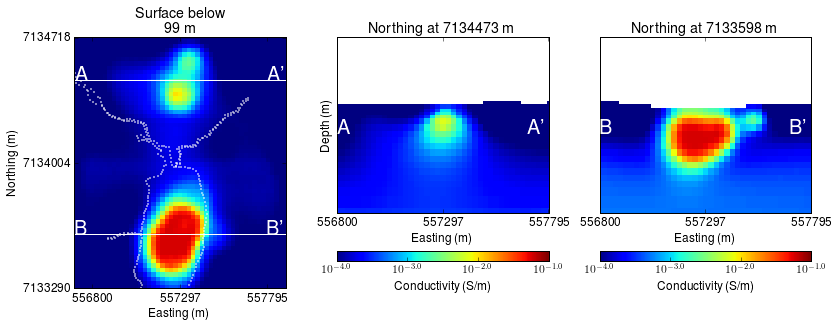

In [209]:
vizCond(sigma_merged_vtem_IP)

318.13
7133598.61
7134473.61
-4 -1


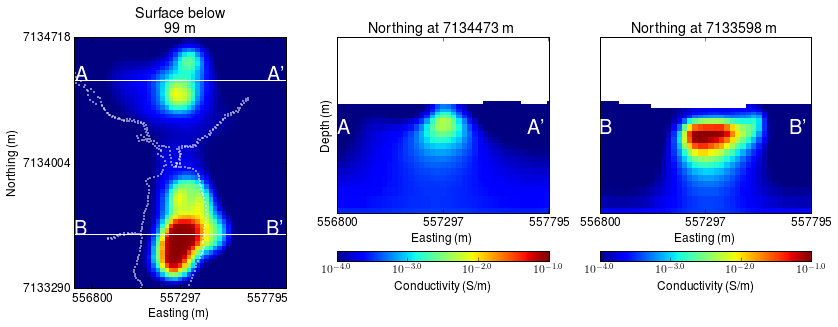

In [210]:
vizCond(sigma_dighem)

318.13
7133598.61
7134473.61
0.0 243.856900485


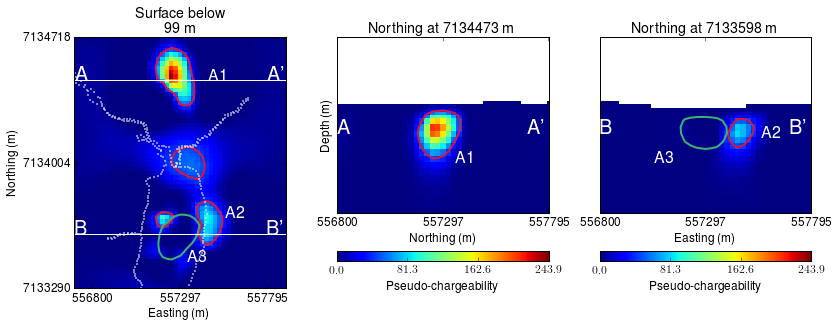

In [211]:
vizE(petaE, petaL, [45],[10])

318.13
7133598.61
7134473.61
0.0 20.8391475709
[Path(array([[  5.57175791e+05,   3.18130000e+02],
       [  5.57173451e+05,   3.43130000e+02],
       [  5.57176400e+05,   3.51114510e+02],
       [  5.57183553e+05,   3.68130000e+02],
       [  5.57201400e+05,   3.81523554e+02],
       [  5.57226400e+05,   3.86054111e+02],
       [  5.57235052e+05,   3.86880000e+02],
       [  5.57251400e+05,   3.88369839e+02],
       [  5.57276400e+05,   3.88782140e+02],
       [  5.57301400e+05,   3.88697602e+02],
       [  5.57323910e+05,   3.86880000e+02],
       [  5.57326400e+05,   3.86684475e+02],
       [  5.57351400e+05,   3.84167208e+02],
       [  5.57376400e+05,   3.76211441e+02],
       [  5.57389150e+05,   3.68130000e+02],
       [  5.57401400e+05,   3.49797571e+02],
       [  5.57406371e+05,   3.43130000e+02],
       [  5.57409748e+05,   3.18130000e+02],
       [  5.57401400e+05,   3.02320740e+02],
       [  5.57397007e+05,   2.93130000e+02],
       [  5.57377874e+05,   2.68130000e+02],
  

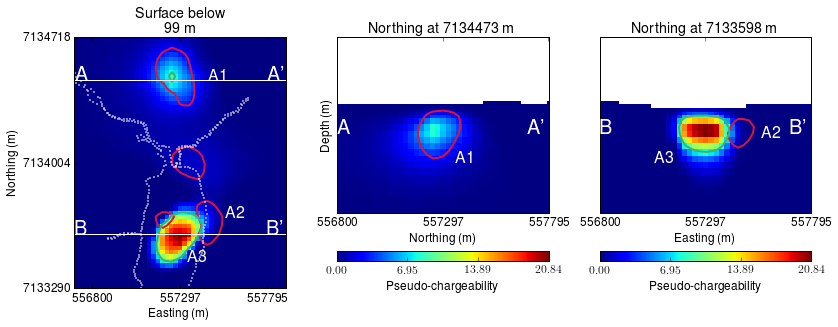

In [212]:
vizL(petaL, petaE, [45],[8])